In [1]:
# Import libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob

# Image size
IMAGE_SIZE = [224, 224]

# Paths
potato_path = '../Datasets/plantvillage dataset/color'
potato_classes = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [2]:
# ResNet50 base model
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze pre-trained layers
for layer in resnet.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(resnet.output)
prediction = Dense(len(potato_classes), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

# Model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [3]:
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training set
training_set = datagen.flow_from_directory(
    potato_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=potato_classes
)

# Validation set
validation_set = datagen.flow_from_directory(
    potato_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=potato_classes
)

# Train
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/10
54/54 [==============================] - 120s 2s/step - loss: 1.7926 - accuracy: 0.6092 - val_loss: 0.5877 - val_accuracy: 0.7698
Epoch 2/10
54/54 [==============================] - 131s 2s/step - loss: 0.5370 - accuracy: 0.8066 - val_loss: 0.5024 - val_accuracy: 0.8093
Epoch 3/10
54/54 [==============================] - 161s 3s/step - loss: 0.6341 - accuracy: 0.7741 - val_loss: 0.8236 - val_accuracy: 0.6698
Epoch 4/10
54/54 [==============================] - 143s 3s/step - loss: 0.5262 - accuracy: 0.8107 - val_loss: 0.5869 - val_accuracy: 0.7930
Epoch 5/10
54/54 [==============================] - 136s 3s/step - loss: 0.4864 - accuracy: 0.8188 - val_loss: 0.6098 - val_accuracy: 0.7721
Epoch 6/10
54/54 [==============================] - 149s 3s/step - loss: 0.5986 - accuracy: 0.7904 - val_loss: 0.5887 - val_accuracy: 0.8233
Epoch 7/10
54/54 [==============================] - 142s 3s/step - loss

In [4]:
# Evaluate
loss, accuracy = model.evaluate(validation_set)
print(f"ResNet50 Potato - Validation Loss: {loss}")
print(f"ResNet50 Potato - Validation Accuracy: {accuracy}")

14/14 [==============================] - 21s 1s/step - loss: 0.8309 - accuracy: 0.6535
ResNet50 Potato - Validation Loss: 0.8308613896369934
ResNet50 Potato - Validation Accuracy: 0.6534883975982666


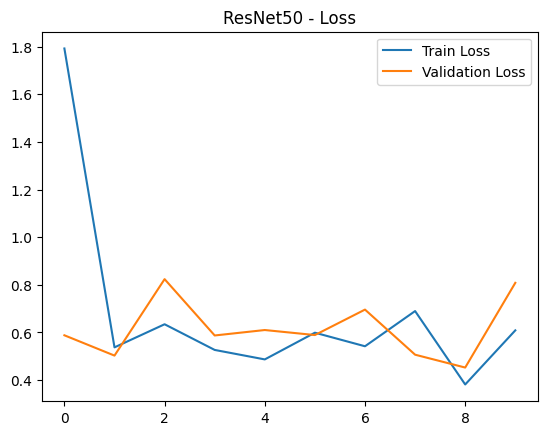

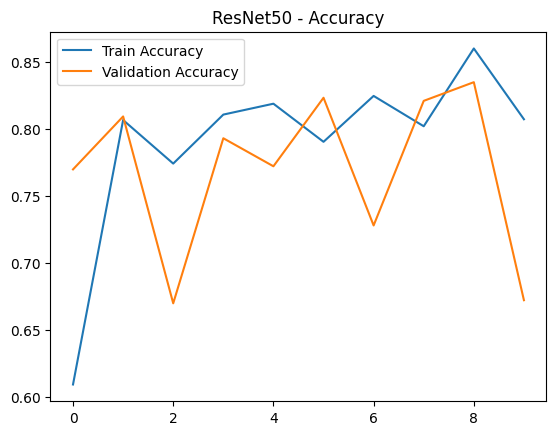

In [5]:
# Plot Loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('ResNet50 - Loss')
plt.show()

# Plot Accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('ResNet50 - Accuracy')
plt.show()

In [6]:
# Save model
model.save('../Models/potato_resnet50.h5')